In [1]:
%load_ext autoreload
%autoreload 2
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [9]:
path = "./mixed_bird/025_Mixed_Bird_Outputs_Train/"
csv_path = "mixed_bird_manual.csv"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [3]:
# Example parameters for BirdNET
#isolation_parameters = {
#    "model" : "birdnet",
#    "output_path" : "outputs",
#    "lat" : 35.4244,
#    "lon" : -120.7463,
#    "week" : 18,
#    "min_conf" : 0.5,
#    "filetype" : "wav", 
#    "num_predictions" : 1,
#    "write_to_csv" : False
#}

# Example Parameters for Microfaune
#isolation_parameters = {
#     "model" : "microfaune",
#     "technique" : "steinberg",
#     "threshold_type" : "median",
#     "threshold_const" : 2.0,
#     "threshold_min" : 0.0,
#     "window_size" : 2.0,
#     "chunk_size" : 5.0
#}

# Example parameters for TweetyNET
isolation_parameters = {
     "model" : "tweetynet",
     "tweety_output": True,
    "technique" : "steinberg",
     "threshold_type" : "median",
     "threshold_const" : 2.0,
     "threshold_min" : 0.0,
     "window_size" : 2.0,
     "chunk_size" : 5.0
}

### Pandas Ouput of Automated Labeling 

In [4]:
 %reload_ext autoreload
automated_df, local_scores = generate_automated_labels(path,isolation_parameters, include_local_scores=True);
automated_df

Failed to load mels_test.pkl
Failed to load mel_dataset.pkl


,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,0.325581,4.000000,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Accipiter-bicolor-451839.wav,0,5.668571,44100,bird,0.996636
1,1.069767,2.232558,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,1.000000
2,4.232558,4.558140,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,0.962226
3,9.976744,2.023256,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,0.854013
4,13.976744,1.651163,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,0,20.688980,44100,bird,0.732851
...,...,...,...,...,...,...,...,...,...
9470,24.558140,0.046512,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.543399
9471,24.837209,0.116279,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.262047
9472,26.325581,1.674419,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.795869
9473,28.116279,0.558140,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,0,31.031995,44100,bird,0.979975


### Function that converts annotations into 3 second chunks

In [5]:
annotation_chunker(automated_df, 3)

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Accipiter-bicolor-451839.wav,5.668571,0,0.0,3.0,44100,bird,0.996636
1,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,20.688980,0,0.0,3.0,44100,bird,1.000000
2,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,20.688980,0,3.0,3.0,44100,bird,1.000000
3,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,20.688980,0,6.0,3.0,44100,bird,0.962226
4,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Aeronautes-montivagus-257782.wav,20.688980,0,9.0,3.0,44100,bird,0.854013
...,...,...,...,...,...,...,...,...,...
5568,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,31.031995,0,15.0,3.0,44100,bird,0.431954
5569,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,31.031995,0,18.0,3.0,44100,bird,0.782242
5570,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,31.031995,0,21.0,3.0,44100,bird,0.782242
5571,./mixed_bird/025_Mixed_Bird_Outputs_Train/,Zimmerius-bolivianus-232569.wav,31.031995,0,24.0,3.0,44100,bird,0.795869


### Human Manual Labels for Comparison 

In [10]:
manual_df = pd.read_csv(csv_path)
manual_df["FOLDER"] = path
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,Unnamed: 0,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER
0,0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,./mixed_bird/025_Mixed_Bird_Outputs_Train/
1,1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,./mixed_bird/025_Mixed_Bird_Outputs_Train/
2,2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100,Aburria aburri Wattled Guan,1050.630,alarce,11/22/2021,2:13:53,./mixed_bird/025_Mixed_Bird_Outputs_Train/
3,3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100,Aburria aburri Wattled Guan,184.388,alarce,11/22/2021,3:28:01,./mixed_bird/025_Mixed_Bird_Outputs_Train/
4,4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100,Aburria aburri Wattled Guan,184.385,alarce,11/22/2021,3:28:01,./mixed_bird/025_Mixed_Bird_Outputs_Train/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31360,31360,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.174,JacobGlennAyers,10/10/2021,2:06:40,./mixed_bird/025_Mixed_Bird_Outputs_Train/
31361,31361,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,Zonotrichia capensis Rufous-collared Sparrow,623.135,JacobGlennAyers,10/10/2021,2:06:40,./mixed_bird/025_Mixed_Bird_Outputs_Train/
31362,31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.527,JacobGlennAyers,10/18/2021,17:33:36,./mixed_bird/025_Mixed_Bird_Outputs_Train/
31363,31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,Zonotrichia capensis Rufous-collared Sparrow,229.543,JacobGlennAyers,10/18/2021,17:33:36,./mixed_bird/025_Mixed_Bird_Outputs_Train/


C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


                                          FOLDER  \
0     ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
1     ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
2     ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
3     ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
4     ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
...                                          ...   
6961  ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
6962  ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
6963  ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
6964  ./mixed_bird/025_Mixed_Bird_Outputs_Train/   
6965  ./mixed_bird/025_Mixed_Bird_Outputs_Train/   

                               IN FILE  CLIP LENGTH  CHANNEL  OFFSET  \
0         Accipiter-bicolor-451839.wav     5.668571        0     0.0   
1     Aeronautes-montivagus-257782.wav    20.688980        0     0.0   
2     Aeronautes-montivagus-257782.wav    20.688980        0     3.0   
3     Aeronautes-montivagus-257782.wav    20.688980        0     6.0   
4     Aeronaute

C:\Users\Siloux\Desktop\E4E\PyHa\PyHa\annotation_post_processing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


target 6966
confidence 6966


0.912386582935787

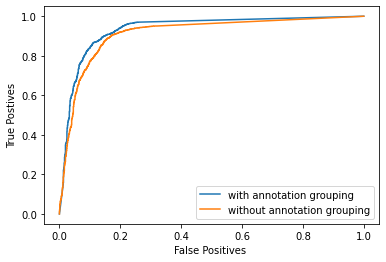

In [11]:
 %reload_ext autoreload
from PyHa.visualizations import *
generate_ROC_curves_simple(automated_df, manual_df, label="with annotation grouping", chunk_length=3)
generate_ROC_curves(automated_df, manual_df, local_scores, label="without annotation grouping", chunk_length=3)